<a href="https://colab.research.google.com/github/martydom/Corona-Virus-Tweet-Sentiment-Analysis/blob/main/Devashish_Bose_Team_1_Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

We have 6 Features but only considering 4 of them to analyze our tweets

# **What I did:**
1. Day 1
>1. Plotted distribution of dates for each and every Sentiment, saw some variations for a particular date.
>2. Tried to see distribution of Sentiments from a particular location
>3.  Made a function to guess the sentiment of the tweet.

2. Day 2
>1. Filtered and cleaned Text Data
>2. Made Dummy variables for dates
>3. Vectorized Words and Hash Tags Separately

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(30,12)})

In [3]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 4/Week 1/Coronavirus Tweets.csv', encoding= 'latin-1')

In [4]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


Null Values for Location

In [6]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

Associating a score to sentiment of tweets

In [7]:
df['Ordinal_Sentiment'] = df['Sentiment'].replace({"Positive":1,'Negative':-1,'Neutral':0,'Extremely Positive':2,'Extremely Negative':-2})

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


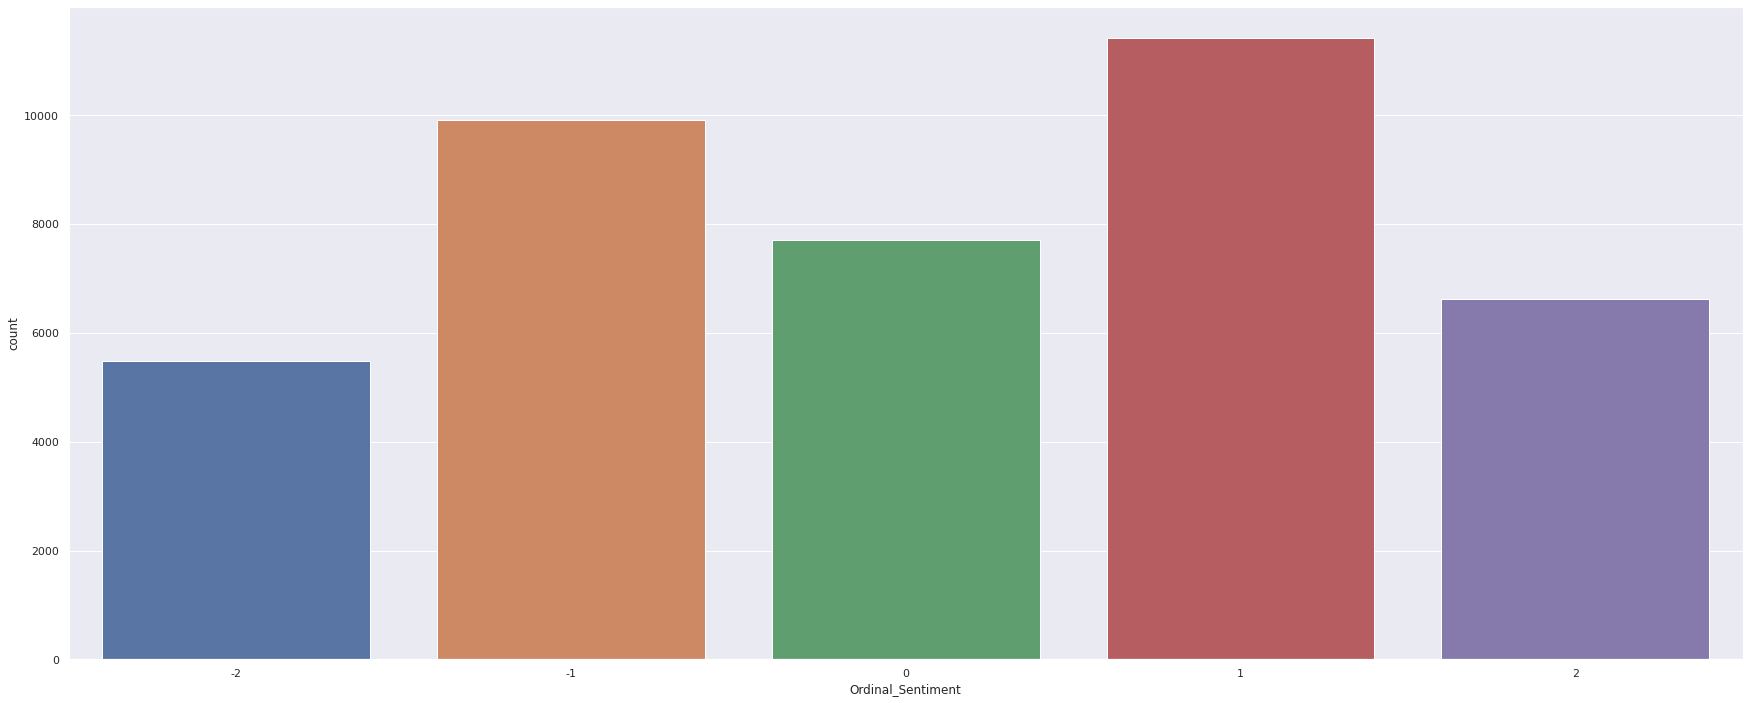

In [8]:
sns.countplot(df['Ordinal_Sentiment'])

Plotting Data according to date.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

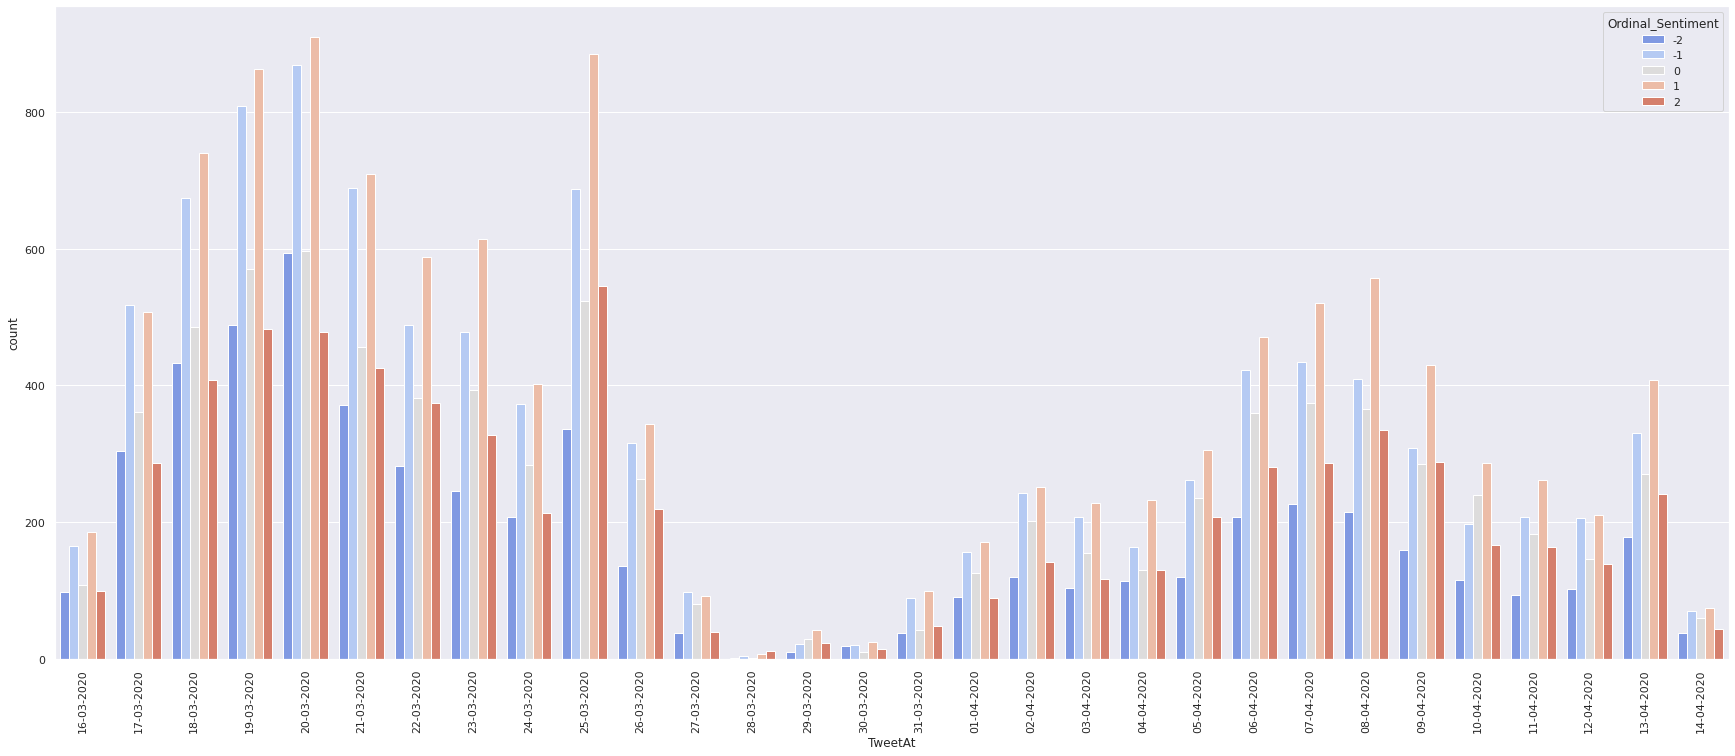

In [9]:
sns.countplot(df['TweetAt'],hue=df['Ordinal_Sentiment'],palette = 'coolwarm')
plt.xticks(rotation = 90)

In [10]:
df['Location'].value_counts()

London               540
United States        528
London, England      520
New York, NY         395
Washington, DC       373
                    ... 
ghana                  1
Afton, Virginia        1
untraceable            1
Tennessee              1
Brackley, England      1
Name: Location, Length: 12220, dtype: int64

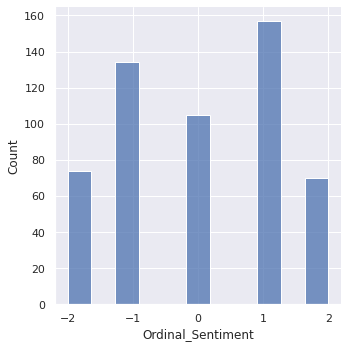

In [11]:
sns.displot(df[df['Location']=='London']['Ordinal_Sentiment'])

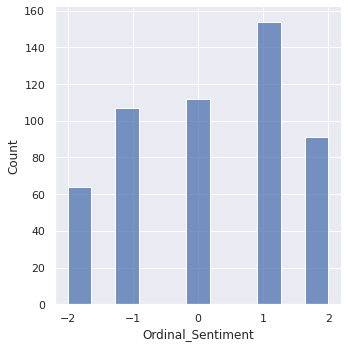

In [12]:
sns.displot(df[df['Location']=='United States']['Ordinal_Sentiment'])

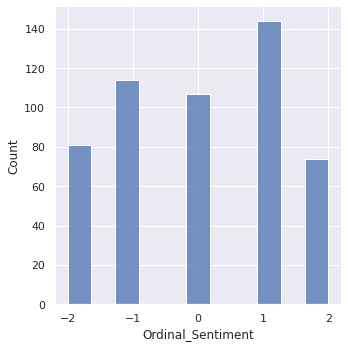

In [13]:
sns.displot(df[df['Location']=='London, England']['Ordinal_Sentiment'])

Although Location an be a factor affecting the tweet sentiments, we have too many to be handled.

If there Could be a way to segregate them using Countries, it would be a great way.

In [14]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'Ordinal_Sentiment'],
      dtype='object')

Wacthing And trying to guess random tweets

In [15]:
def guess_tweet():
  r=np.random.randint(0,df.shape[0])
  a,b = df.loc[r,['OriginalTweet','Ordinal_Sentiment']]
  print(a)
  guess = int(input('Enter Your guess: '))
  if guess == b:
    print('Congrats you are right')
  else:
    print(f"You're wrong the original sentiment score is {b}")

  return None

In [16]:
guess_tweet()




@DonaldJTrumpJr
Enter Your guess: -1
You're wrong the original sentiment score is -2


In [17]:
guess_tweet()


YOU need to wash your fruit and vegetables with SOAP: Virologist confirms that COVID-19 can survive on fresh supermarket produce just like any other surface..
Enter Your guess: 1
Congrats you are right


In [18]:
guess_tweet()

@dougducey Covid-19 can be spread by asymptomatic carriers.  Essential grocery store overnight stockers touch all the stock that customers buy. Kroger Family Co., (Frys) ordered protective measures on 4/6/2020. Shouldn't other grocery stores adapt their p
Enter Your guess: 1
You're wrong the original sentiment score is 0


In [19]:
guess_tweet()



https://t.co/0yILXVpDKp
Enter Your guess: -2
You're wrong the original sentiment score is 0


In [20]:
guess_tweet()

Will be putting Âworked in the consumer packaged goods industry during COVID-19 outbreakÂ on my resume after all of this is done. If you know the amount of work that is put into getting food in a store, then you understand what IÂm talking about ?
Enter Your guess: 1
You're wrong the original sentiment score is 0


In [21]:
guess_tweet()

Supermarkets and any confined space with lots of people could leave shoppers vulnerable to the
Enter Your guess: 0
You're wrong the original sentiment score is -1


In [22]:
guess_tweet()

Reports have been received of fraudsters targeting vulnerable people by posing as charity volunteers offering to help with shopping offering fake testing or claiming to be raising charity funds Report scammers via Citizens Advice Consumer Service on 0808 223 1133
Enter Your guess: 0
Congrats you are right


We See a Pattern here, that the tweets have sentiment according to some words it contain. If it's something good because of corona it stays in the postive side. else in the negative side
We will dive deep into it tomorrow

# **Day2**

Transforming Data

In [23]:
X_date = pd.get_dummies(df['TweetAt'],prefix='is_date')

Cleaning the Original Tweets.

In [24]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
def rm_links_and_ids(tweet):
  a=[]
  for word in tweet.split():
    if word.startswith('https:') or word.startswith('http:') or word.startswith('@'):
      continue
    else:
      a.append(word)
  return ' '.join(a)

In [26]:
def rm_escape_chars(tweet):
  return tweet.replace('/r',' ').replace('/n',' ')

In [27]:
def rem_pun(tweet):
  stri = ''
  for i in tweet:
    if i not in punc:
      stri+=i
    else:
      stri+=' '
  return stri

In [28]:
def get_tags(tweet):
  stri = ''
  for word in tweet.lower().split():
    if word.startswith("#"):
      stri+=word[1:]+' '
  return stri[:-1]

In [29]:
def rm_sw(tweet):
  a= []
  sw = stopwords.words('english')
  for word in tweet.lower().split():
    if word.startswith('#'):
      continue
    if word not in sw:
      a.append(word)
  return ' '.join(a)

In [30]:
punc = string.punctuation.replace('#','')

In [31]:
punc

'!"$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
df['filtered_tweets'] = df['OriginalTweet'].apply(rm_links_and_ids).apply(rm_escape_chars).apply(rem_pun)

In [33]:
df['hashtags'] = df['filtered_tweets'].apply(get_tags)

In [34]:
df['words'] = df['filtered_tweets'].apply(rm_sw)

In [35]:
ot,ht,w=df.loc[np.random.randint(0,df.shape[0]),['OriginalTweet','hashtags','words']]
print(f'Original Tweet:{ot}\nHashtag:{ht}\nWords:{w}')

Original Tweet:all these stores have sales cause of covid-19 and i just spent so much money from online shopping ?????
Hashtag:
Words:stores sales cause covid 19 spent much money online shopping


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
ht_vect = TfidfVectorizer(min_df=5)

In [38]:
w_vect = TfidfVectorizer(min_df=10)

In [39]:
X_ht = ht_vect.fit_transform(df['hashtags'])
X_w = w_vect.fit_transform(df['words'])

In [40]:
ht_df= pd.DataFrame(data=X_ht.toarray(), columns=ht_vect.get_feature_names())

In [41]:
w_df = pd.DataFrame(data = X_w.toarray(), columns=w_vect.get_feature_names())

In [42]:
ht_df.head()

,1u,2019cov,2019ncov,2020,21daylockdown,21dayslockdown,30moredays,3dprinting,5g,5gtowers,7news,accc,actsofkindness,ad,adelaide,ads,advertising,advisorymandi,afghanistan,africa,afterhours,agenparl,agriculture,ai,airlines,alberta,alcohol,aldi,alert,alonetogether,aluminium,amazon,amazonprime,america,americans,amwriting,analytics,animalcrossing,animalcrossingnewhorizons,antibacterial,...,wereinthistogether,wfh,wheat,whitehouse,who,wholefoods,wholesale,wine,wisconsin,woolworths,work,workers,workfromhome,workingfromhome,workingfromhomelife,workstream,world,worldhealthday,worldhealthday2020,worldwide,writingcommnunity,writingcommunity,wtf,wti,wuhan,wuhancoronavirus,wuhanvirus,wwe,wwg1wga,yeg,ynwa,yomequedoencasa,youllneverwalkalone,yoursafetyismysafety,youtube,yvr,yyc,zimbabwe,zombie,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
w_df.head()

,00,000,00am,00pm,03,04,06,08,09,10,100,1000,100k,100s,101,10am,10k,10pm,10th,11,11am,12,120,13,130,14,15,150,16,160,17,18,19,19australia,19india,19sa,19th,19uk,19â,1m,...,written,wrong,wrote,wsj,wtf,wti,wuhan,wwii,ya,yall,yeah,year,years,yeast,yell,yelled,yellow,yep,yes,yesterday,yet,yo,york,yorkers,young,younger,youth,youtube,youâ,yoy,yr,yrs,yâ,zealand,zero,zimbabwe,zombie,zombies,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.099462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
new_df = pd.concat([X_date,ht_df,w_df,df['Ordinal_Sentiment']],axis=1)

In [45]:
new_df.head()

,is_date_01-04-2020,is_date_02-04-2020,is_date_03-04-2020,is_date_04-04-2020,is_date_05-04-2020,is_date_06-04-2020,is_date_07-04-2020,is_date_08-04-2020,is_date_09-04-2020,is_date_10-04-2020,is_date_11-04-2020,is_date_12-04-2020,is_date_13-04-2020,is_date_14-04-2020,is_date_16-03-2020,is_date_17-03-2020,is_date_18-03-2020,is_date_19-03-2020,is_date_20-03-2020,is_date_21-03-2020,is_date_22-03-2020,is_date_23-03-2020,is_date_24-03-2020,is_date_25-03-2020,is_date_26-03-2020,is_date_27-03-2020,is_date_28-03-2020,is_date_29-03-2020,is_date_30-03-2020,is_date_31-03-2020,1u,2019cov,2019ncov,2020,21daylockdown,21dayslockdown,30moredays,3dprinting,5g,5gtowers,...,wrong,wrote,wsj,wtf,wti,wuhan,wwii,ya,yall,yeah,year,years,yeast,yell,yelled,yellow,yep,yes,yesterday,yet,yo,york,yorkers,young,younger,youth,youtube,youâ,yoy,yr,yrs,yâ,zealand,zero,zimbabwe,zombie,zombies,zone,zoom,Ordinal_Sentiment
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2


Analyzing the new Df

In [46]:
# Ram Crashes For operations Like these
# new_df[new_df['Ordinal_Sentiment']==-2].sum(axis=0).sort_values(ascending=False)[:50]

coronavirus           1055.693650
is_date_20-03-2020     594.000000
is_date_19-03-2020     489.000000
is_date_18-03-2020     433.000000
is_date_21-03-2020     372.000000
covid                  348.892403
is_date_25-03-2020     336.000000
is_date_17-03-2020     304.000000
is_date_22-03-2020     282.000000
covid19                253.347486
is_date_23-03-2020     246.000000
is_date_07-04-2020     227.000000
is_date_08-04-2020     214.000000
is_date_24-03-2020     208.000000
is_date_06-04-2020     207.000000
panic                  194.418424
food                   182.106262
19                     178.471667
is_date_13-04-2020     178.000000
covid2019              159.125526
is_date_09-04-2020     159.000000
crisis                 158.369375
people                 150.785654
prices                 145.229924
covid                  144.679831
is_date_26-03-2020     136.000000
buying                 124.398901
is_date_05-04-2020     120.000000
is_date_02-04-2020     119.000000
is_date_10-04-